### IMPORTING MODULES:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score

### READING THE CSV FILE:

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df1.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
area_type,13320,4,Super built-up Area,8790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability,13320,81,Ready To Move,10581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,13319,1305,Whitefield,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,13304,31,2 BHK,5199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
society,7818,2688,GrrvaGr,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_sqft,13320,2117,1200,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bath,13247.0,NaN,NaN,NaN,2.69261,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,NaN,NaN,NaN,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,NaN,NaN,NaN,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


### DATA PRE-PROCESSING:

#### Finding and removing duplicates:

In [6]:
df1.duplicated().sum()

529

In [7]:
df2 = df1.drop_duplicates() 

In [8]:
print("Before removing duplicates, size =", df1.shape)
print("Before removing duplicates, size =", df2.shape)

Before removing duplicates, size = (13320, 9)
Before removing duplicates, size = (12791, 9)


#### Identifying and creating list that consists of all categorical type columns:

In [9]:
categorical_columns = [col for col in df2 if df2.dtypes[col] == 'object']
print(categorical_columns)

['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']


#### Checking unique values for each categorical feature:

In [10]:
for col in categorical_columns:
    print(f"{col.upper()}: {df2[col].nunique()}")
    print(df2[col].value_counts().sort_values(ascending=[False]))
    print("\n")

AREA_TYPE: 4
Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: area_type, dtype: int64


AVAILABILITY: 81
Ready To Move    10172
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
                 ...  
14-Nov               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64


LOCATION: 1305
Whitefield              523
Sarjapur  Road          379
Electronic City         287
Kanakpura Road          249
Thanisandra             229
                       ... 
Richmond Road             1
Kanakapura  Rod           1
Off Bannergatta Road      1
Bhattarahalli             1
Abshot Layout             1
Name: location, Length: 1305, dtype: int64


SIZE: 31
2 BHK         4931
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom   

#### Identifying columns with missing values:

In [11]:
df2.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

#### Dropping Society and Balcony as they have highest number of missing values.

In [12]:
df3 = df2.drop(['society', 'balcony'], axis='columns')

#### Filling missing value in location column with mode:

In [13]:
df3['location'].fillna(df3['location'].mode()[0],inplace=True)

#### Dropping rows with missing values:

In [14]:
df3.isna().sum()

area_type        0
availability     0
location         0
size            16
total_sqft       0
bath            73
price            0
dtype: int64

In [15]:
df4 = df3.dropna(axis = 0, subset = ('size','bath'))

In [16]:
df4.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

### FEATURE ENGINEERING:

#### Adding new feature(Integer) "BHK" instead of "size" :

In [17]:
df4['bhk'] = df4['size'].apply(lambda x: int(x.split(' ')[0]))

/var/folders/hf/bw9pz7q13w137qz637x32s980000gn/T/ipykernel_90966/3541655682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['bhk'] = df4['size'].apply(lambda x: int(x.split(' ')[0]))


In [18]:
df4.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2


#### Converting "total_sqft" column to numeric type:

In [19]:
def convert_sqft_to_num(input_value):
    try:
        float_value = float(input_value)
        return float_value
    except:
        if("-" in input_value):
            nums = input_value.split("-")
            return (float(nums[0]) + float(nums[1]))/2
        else:
            return None

In [20]:
convert_sqft_to_num('2000- 3000')

2500.0

In [21]:
convert_sqft_to_num('200 sq. meters')

In [22]:
df5 = df4.copy()
df5['total_sqft'] = df5['total_sqft'].apply(convert_sqft_to_num)
df5.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2


#### Adding price per unit area column:

In [23]:
df5['price_per_sqft'] = (df5['price']*100000/df5['total_sqft']).round()

In [24]:
df5.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3700.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4306.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6246.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0


#### Since we returned None for values which did not depict a range or were in different units, we check for number of new NA values are added into the dataset and drop those rows:

In [25]:
df5.isna().sum()

area_type          0
availability       0
location           0
size               0
total_sqft        46
bath               0
price              0
bhk                0
price_per_sqft    46
dtype: int64

In [26]:
df5.dropna(how = 'any', axis=0, inplace = True)

In [27]:
df5.isna().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

### DIMENSIONALITY REDUCTION:

#### Categorical column "location" has 1305 unique values. This large number of unique values is not favorable for encoding. Hence we are reducing the number of unique values by combining similar values. To do that we remove empty spaces in location column and get unique value counts for each location:

In [28]:
df5['location'] = df5['location'].apply(lambda x:x.strip())

#### Reducing unique count by replacing locations with less than 10 value_counts to "Others" category

In [29]:
df5['location'] = df5['location'].apply(lambda x:'other'if x in df5['location'].value_counts()[df5['location'].value_counts() <= 10] else x)

In [30]:
df5.sample(10)

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
12479,Built-up Area,Ready To Move,Sarjapur Road,3 BHK,1857.0,4.0,155.0,3,8347.0
7841,Plot Area,Ready To Move,Billekahalli,5 Bedroom,1180.0,5.0,98.5,5,8347.0
3321,Super built-up Area,Ready To Move,Marathahalli,2 BHK,1365.0,2.0,73.0,2,5348.0
695,Super built-up Area,Ready To Move,other,3 BHK,1750.0,3.0,120.0,3,6857.0
9591,Built-up Area,Ready To Move,Kanakpura Road,2 BHK,1140.0,2.0,65.0,2,5702.0
12760,Super built-up Area,Ready To Move,other,2 BHK,1145.0,2.0,44.0,2,3843.0
9298,Super built-up Area,Ready To Move,Hormavu,2 BHK,1129.0,2.0,44.0,2,3897.0
7199,Plot Area,Ready To Move,Tindlu,3 Bedroom,720.0,3.0,81.0,3,11250.0
7243,Built-up Area,Ready To Move,other,2 BHK,959.0,2.0,42.5,2,4432.0
343,Built-up Area,Ready To Move,7th Phase JP Nagar,3 BHK,1850.0,3.0,150.0,3,8108.0


In [31]:
df5['location'].value_counts()

other               2920
Whitefield           517
Sarjapur  Road       372
Electronic City      289
Kanakpura Road       240
                    ... 
Doddaballapur         11
LB Shastri Nagar      11
Tindlu                11
HAL 2nd Stage         11
Banjara Layout        11
Name: location, Length: 233, dtype: int64

### OUTLIERS REMOVAL USING BUSINESS LOGIC:

#### Looking at the summary of numeric columns to identify anomalies:

In [32]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,12672.0,1565.160267,1258.837032,1.0,1100.0,1280.0,1685.0,52272.0
bath,12672.0,2.707150,1.355174,1.0,2.0,2.0,3.0,40.0
price,12672.0,114.030494,151.710789,8.0,50.0,73.0,120.0,3600.0
bhk,12672.0,2.814946,1.309769,1.0,2.0,3.0,3.0,43.0
price_per_sqft,12672.0,8037.169508,108925.478314,268.0,4299.0,5484.0,7405.0,12000000.0


#### 1. Handling "total_sqft" column :

In [33]:
df5.total_sqft.sort_values()

4086         1.0
4972         5.0
349         11.0
1020        15.0
1122        24.0
          ...   
12987    30400.0
674      35000.0
5469     36000.0
5393     42000.0
1894     52272.0
Name: total_sqft, Length: 12672, dtype: float64

The min value for "total_sqft" column is 5.0 and appears to be low in many cases. A 1 BHK flat would atleast require an average of 350 sqft to be constructed. Hence we will be dropping all oberservations whose total_sqft value is below 300 sqft.

In [34]:
df5.drop(df5[df5['total_sqft'] < 300].index, inplace = True)

#### 14 observations were removed from the dataset whose total_sqft values were below 300

In [35]:
df5.total_sqft.sort_values()

4853       300.0
11495      302.0
992        315.0
1471       340.0
12464      350.0
          ...   
12987    30400.0
674      35000.0
5469     36000.0
5393     42000.0
1894     52272.0
Name: total_sqft, Length: 12661, dtype: float64

#### 2. Handling "price_per_sqft" column: 

In [36]:
df5.price_per_sqft.sort_values()

1894        268.0
674         371.0
5393        417.0
11748       500.0
7242        574.0
           ...   
8398      56000.0
12443     59770.0
6421      76531.0
7088      76923.0
7657     176471.0
Name: price_per_sqft, Length: 12661, dtype: float64

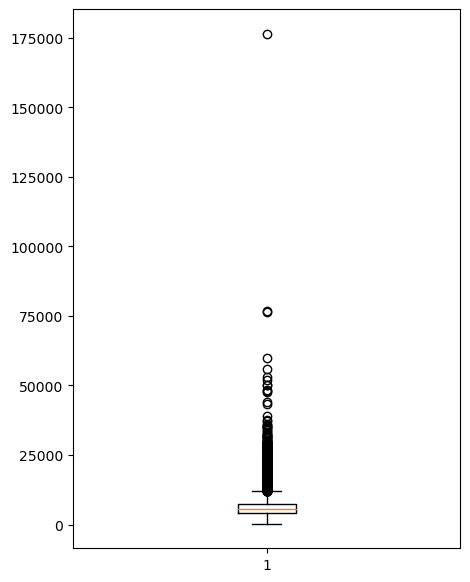

In [37]:
fig = plt.figure(figsize =(5, 7))
plt.boxplot(df5['price_per_sqft'])
plt.show()

We can see that lot of outliers exist in the price_per_sqft column. We can identify this by seeing the above boxplot and the max value from the above describe table.

#### Removing outliers from "price_per_sqft":
The min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation.

In [38]:
for key, sub_df in df5.groupby('location'):
    print(key, sub_df)

1st Block Jayanagar                   area_type   availability             location       size  \
210    Super built-up  Area         20-May  1st Block Jayanagar      4 BHK   
848    Super built-up  Area         18-Jun  1st Block Jayanagar      3 BHK   
1162   Super built-up  Area         17-Dec  1st Block Jayanagar      6 BHK   
2152   Super built-up  Area  Ready To Move  1st Block Jayanagar      3 BHK   
2355             Plot  Area  Ready To Move  1st Block Jayanagar  4 Bedroom   
4991   Super built-up  Area  Ready To Move  1st Block Jayanagar      2 BHK   
5115             Plot  Area  Ready To Move  1st Block Jayanagar  7 Bedroom   
6168             Plot  Area  Ready To Move  1st Block Jayanagar  8 Bedroom   
7138         Built-up  Area         15-Dec  1st Block Jayanagar      3 BHK   
7358   Super built-up  Area         18-Jun  1st Block Jayanagar      2 BHK   
7383   Super built-up  Area         20-May  1st Block Jayanagar      4 BHK   
8507   Super built-up  Area  Ready To Move  

Kalena Agrahara                   area_type   availability         location   size  \
76     Super built-up  Area  Ready To Move  Kalena Agrahara  2 BHK   
156    Super built-up  Area  Ready To Move  Kalena Agrahara  2 BHK   
269    Super built-up  Area  Ready To Move  Kalena Agrahara  3 BHK   
286          Built-up  Area  Ready To Move  Kalena Agrahara  2 BHK   
302    Super built-up  Area  Ready To Move  Kalena Agrahara  3 BHK   
342    Super built-up  Area  Ready To Move  Kalena Agrahara  2 BHK   
599    Super built-up  Area  Ready To Move  Kalena Agrahara  3 BHK   
1494   Super built-up  Area  Ready To Move  Kalena Agrahara  3 BHK   
1514         Built-up  Area  Ready To Move  Kalena Agrahara  2 BHK   
2610   Super built-up  Area  Ready To Move  Kalena Agrahara  2 BHK   
3997   Super built-up  Area  Ready To Move  Kalena Agrahara  2 BHK   
4531   Super built-up  Area  Ready To Move  Kalena Agrahara  2 BHK   
5683         Built-up  Area  Ready To Move  Kalena Agrahara  3 BHK   
6355

In [39]:
def removing_price_per_sqft_outliers(df):
    df_output = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        # calculating mean and std-deviation of price_per_sqft for each location
        mean = np.mean(sub_df.price_per_sqft)
        sd = np.std(sub_df.price_per_sqft)
        # filtering the observations lying between 1.5 std-devs.
        filtered_df = sub_df[(sub_df.price_per_sqft >= (mean-1.5*sd)) & (sub_df.price_per_sqft <= (mean+1.5*sd))]
        df_output = pd.concat([df_output, filtered_df], ignore_index = True)
    return df_output

In [40]:
df6 = removing_price_per_sqft_outliers(df5)

In [41]:
df6.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,11675.0,1525.376428,1112.144484,300.0,1100.0,1277.0,1655.0,52272.0
bath,11675.0,2.601542,1.200707,1.0,2.0,2.0,3.0,27.0
price,11675.0,98.393471,101.134804,9.0,49.5,70.0,110.0,2200.0
bhk,11675.0,2.711349,1.144040,1.0,2.0,3.0,3.0,27.0
price_per_sqft,11675.0,6103.797430,2951.476071,268.0,4250.0,5308.0,6877.0,27083.0


#### From the above describe tables, ee can observe that price_per_sqft has significantly reduced from 2300000 to 24000.  We can also observe that the minimum value for price_per_sqft is still quite low, i.e., 268. To further refine this range we can reduce the std.dev (sd) value to 1. 

In [42]:
print("price_per_sqft after outlier removal",'\n',df6.price_per_sqft.sort_values())

price_per_sqft after outlier removal 
 9339       268.0
10059      417.0
9123       730.0
10828      730.0
11516      912.0
          ...   
2786     24510.0
2782     25000.0
2785     26000.0
2784     26974.0
2783     27083.0
Name: price_per_sqft, Length: 11675, dtype: float64


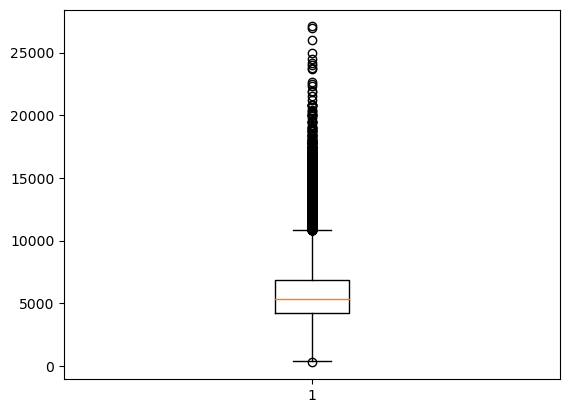

In [43]:
plt.boxplot(df6['price_per_sqft'])
plt.show()

In [44]:
df6.shape

(11675, 9)

#### 3. Handling "bhk" Column:

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like.

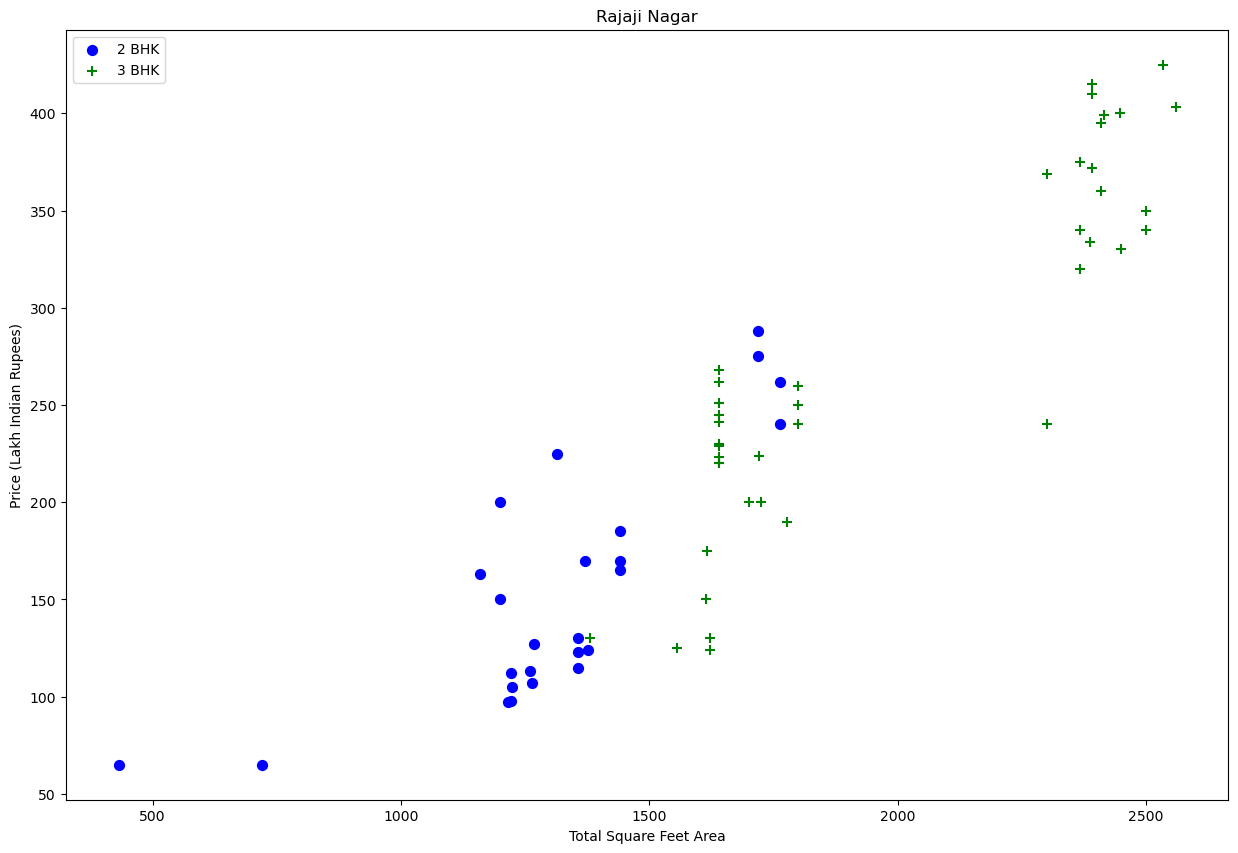

In [45]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

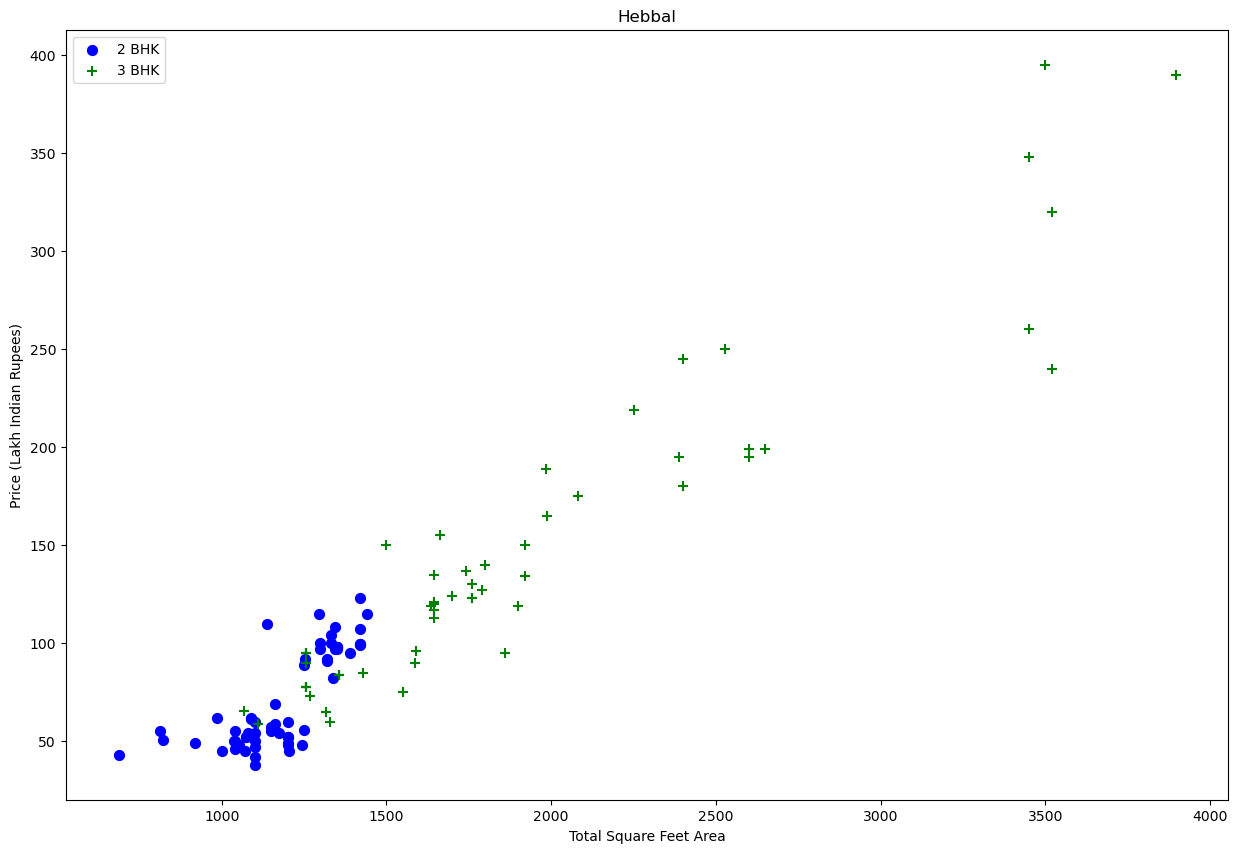

In [46]:
plot_scatter_chart(df6,"Hebbal")

From the above describe table we can observe that BHK column also has some outliers with range from 1 to 27 but having 3rd Quartile value as 3 only.

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    }  }

In [47]:
print(df6.bhk.sort_values())

5218      1
9109      1
1596      1
10928     1
1592      1
         ..
10972    13
9966     14
9699     16
11319    18
9305     27
Name: bhk, Length: 11675, dtype: int64


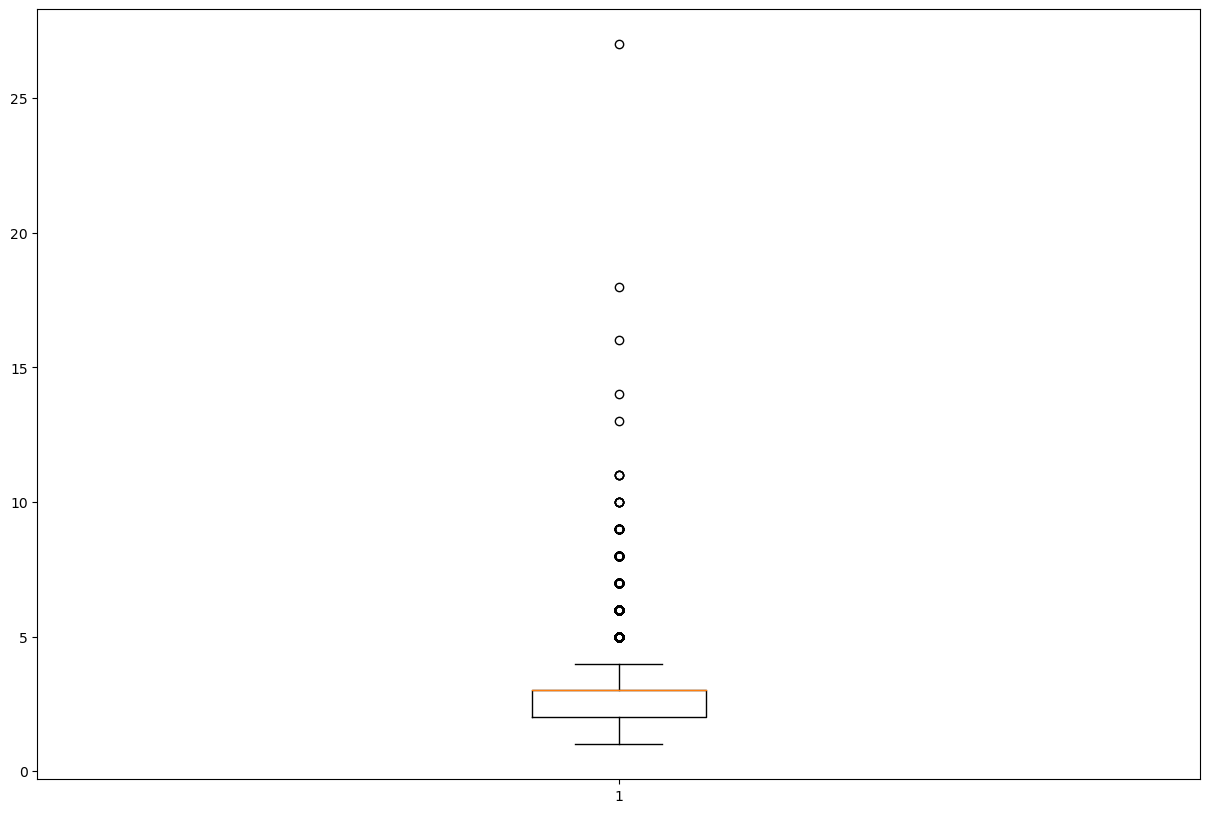

In [48]:
plt.boxplot(df6['bhk'])
plt.show()

#### Removing outliers from "bhk":

In [49]:
def removing_bhk_outliers(data):
    # creating an array that will store the indices that we want to exclude
    exclude_indices = np.array([])
    # Doing groupby on location to get location and location-subGroup for each location
    for location,location_df in data.groupby('location'):
        #Creating a dictionary to store bhk stats
        bhk_stats = {}
        
        #For each location-subGroup, we do groupby on bhk and get bhk and bhk-subGroup for each location-subGroup
        for bhk,bhk_df in location_df.groupby('bhk'):
            #storing mean,std-dev and count in bhk_stats
            bhk_stats[bhk] ={
                'mean':np.mean(bhk_df.price_per_sqft),
                'sd':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
        }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                # Appending exclude_indices as per the excluded bhk after above computation
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return data.drop(exclude_indices, axis='index')

In [50]:
## CHECKING the raw sub-grouped data (Temp output ... only 1 time)
## The data shows: For each location - A dictionary with bhk stats for each bhk type in the location.
##  observe : The lower bound of a (n)BHK will be mean of (n-1)BHK & 
#            Hence here we will keep the row if lowerbound(n)BHK > mean(n-1)BHK

df7 = removing_bhk_outliers(df6)

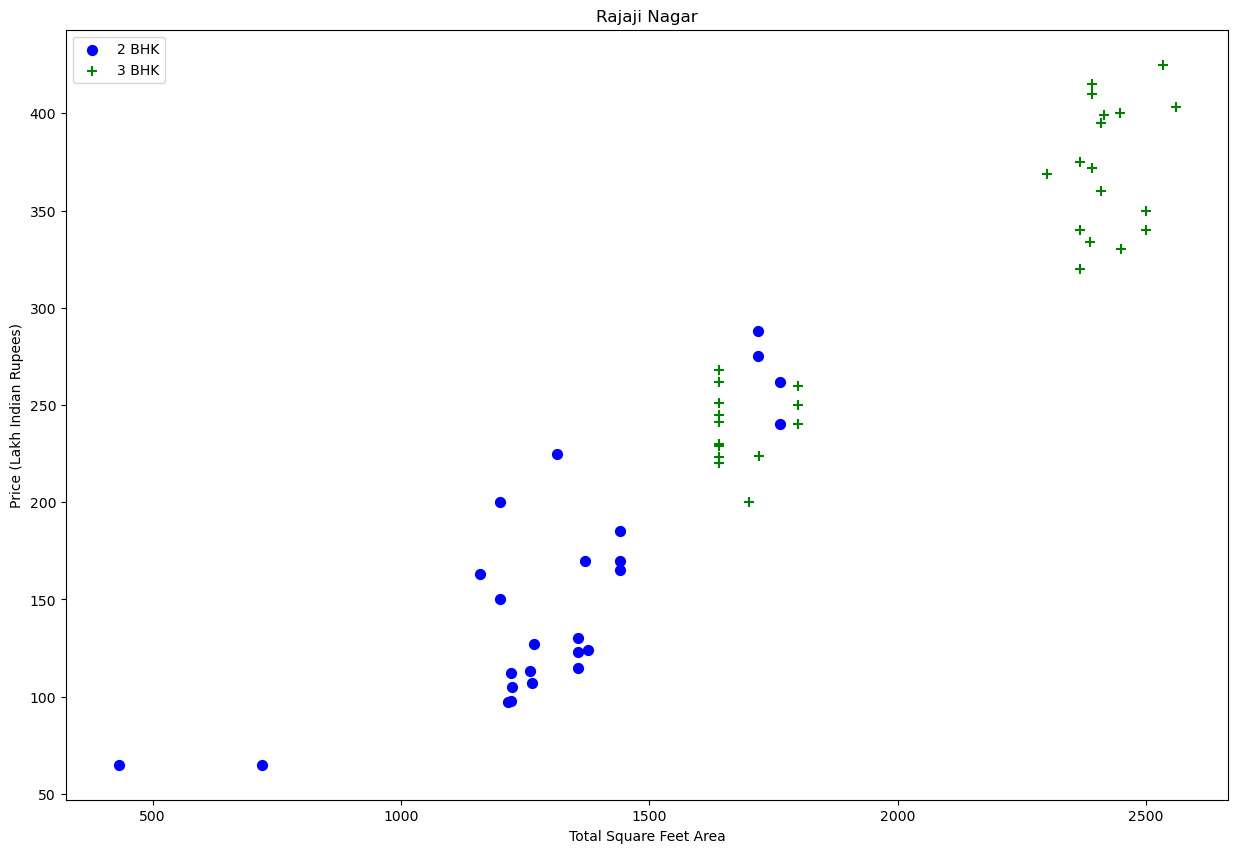

In [51]:
plot_scatter_chart(df7,"Rajaji Nagar")

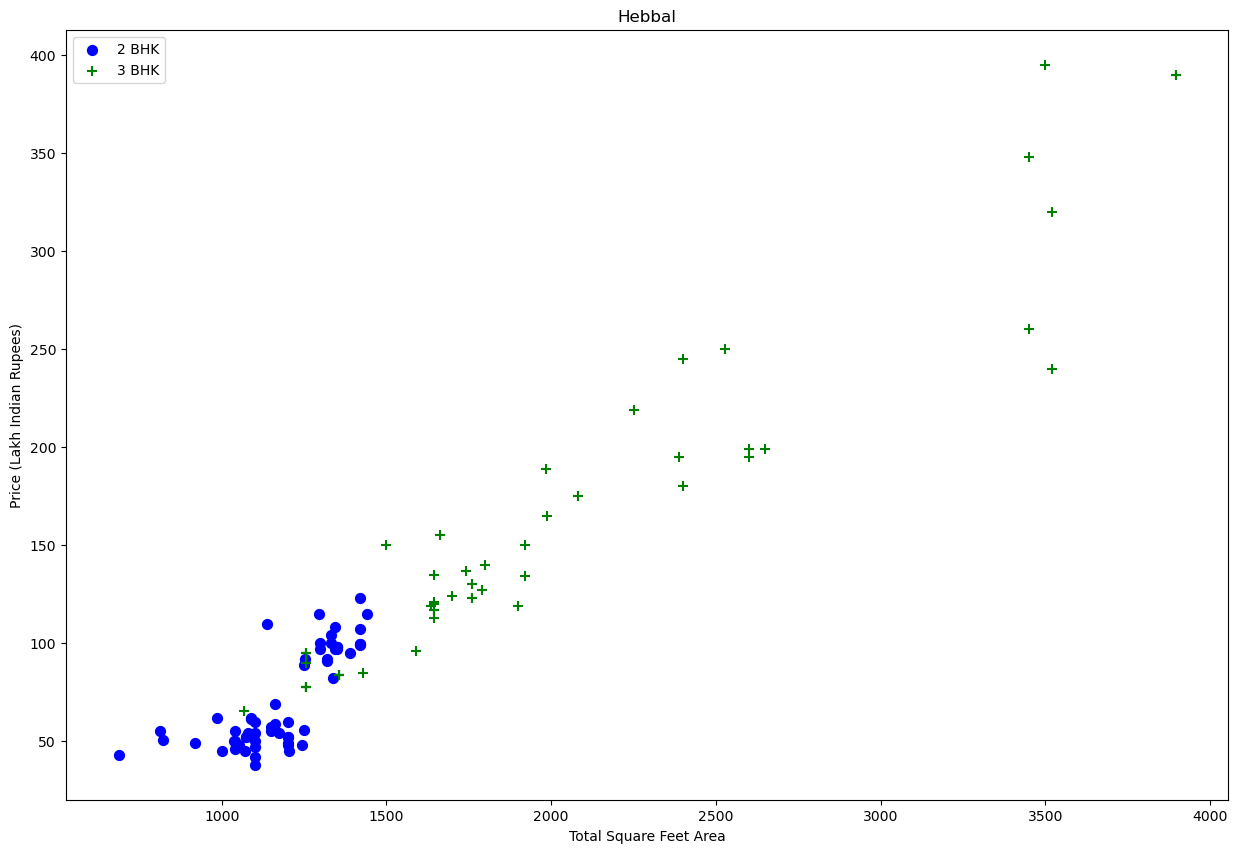

In [52]:
plot_scatter_chart(df7,"Hebbal")

In [53]:
df7.shape

(8269, 9)

Text(0, 0.5, 'Count')

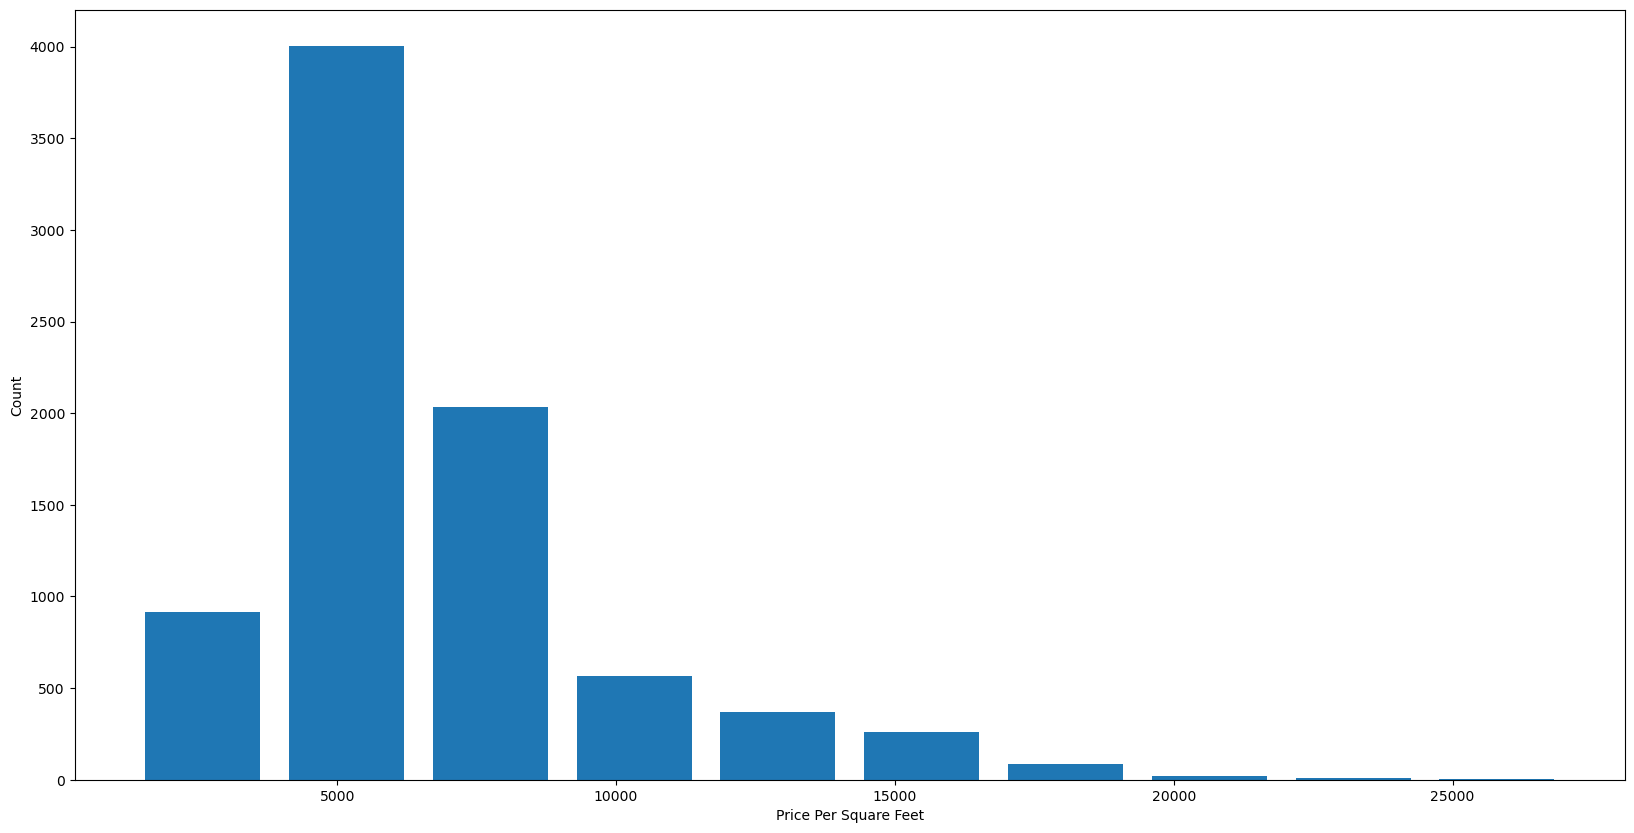

In [54]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


#### Removing Outliers from "bath" feature:

In [55]:
df7.bath.unique()

array([ 4.,  3.,  6.,  2.,  5.,  7.,  8.,  1.,  9., 12., 10., 14., 27.,
       11., 16., 15., 13., 18.])

Text(0, 0.5, 'Count')

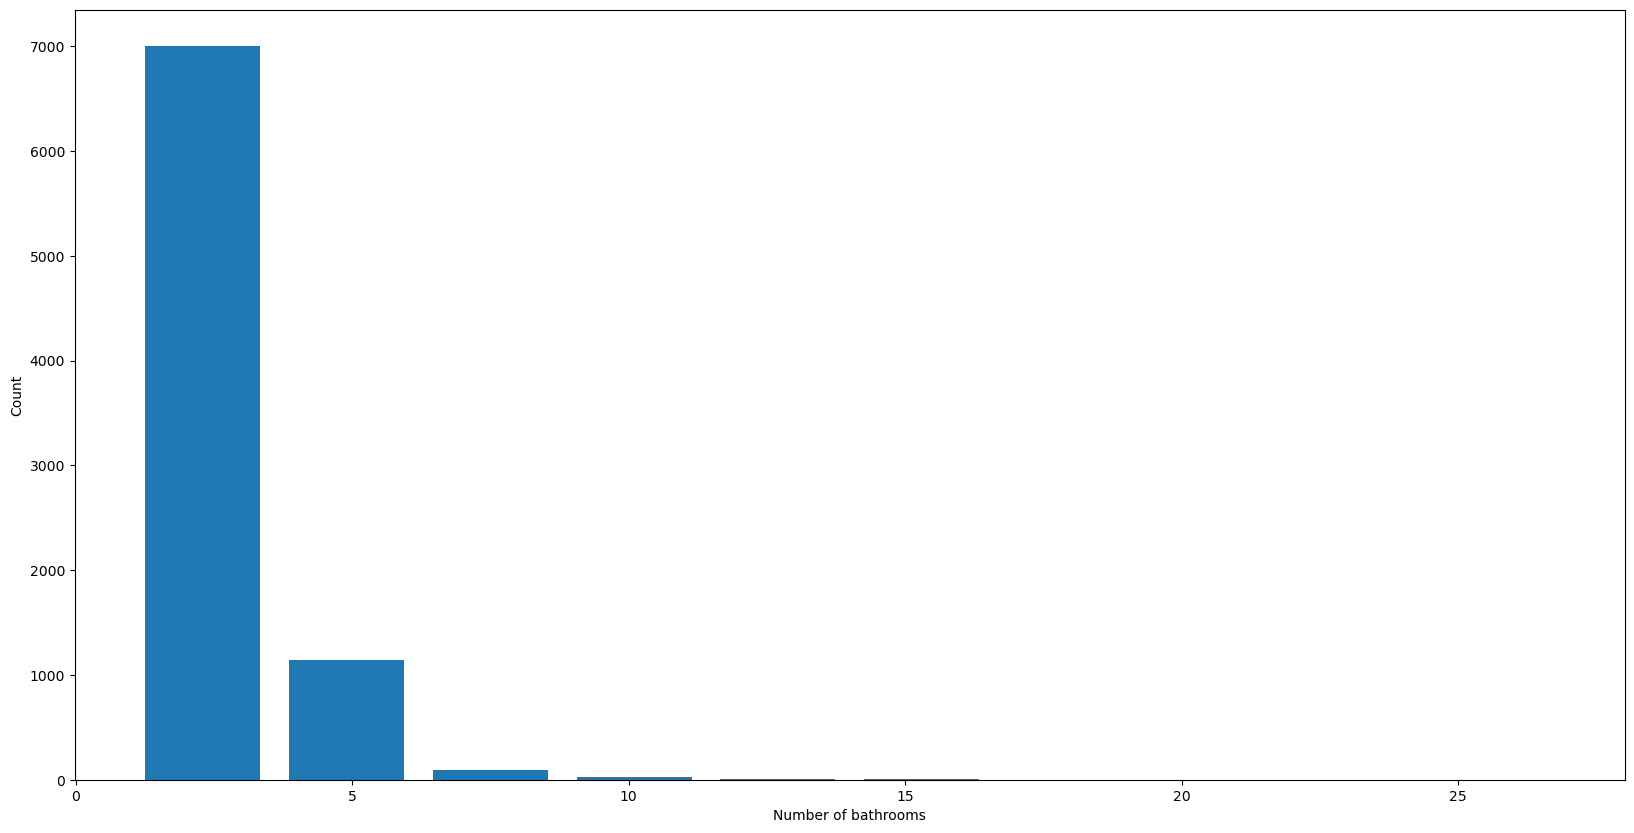

In [56]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [57]:
df7[df7.bath>10]

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
4169,Plot Area,Ready To Move,KR Puram,8 Bedroom,1200.0,12.0,110.0,8,9167.0
5983,Super built-up Area,Ready To Move,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.0
9170,Plot Area,Ready To Move,other,9 Bedroom,3300.0,14.0,500.0,9,15152.0
9305,Super built-up Area,Ready To Move,other,27 BHK,8000.0,27.0,230.0,27,2875.0
9312,Plot Area,Ready To Move,other,11 Bedroom,1200.0,11.0,170.0,11,14167.0
9363,Plot Area,Ready To Move,other,8 Bedroom,990.0,12.0,120.0,8,12121.0
9699,Super built-up Area,Ready To Move,other,16 BHK,10000.0,16.0,550.0,16,5500.0
9966,Super built-up Area,Ready To Move,other,14 BHK,1250.0,15.0,125.0,14,10000.0
10577,Super built-up Area,Ready To Move,other,11 BHK,6000.0,12.0,150.0,11,2500.0
10602,Plot Area,Ready To Move,other,8 Bedroom,1850.0,12.0,300.0,8,16216.0


It is unusual to have 2 more bathrooms than number of bedrooms in a home.

In [58]:
df7[df7.bath>df7.bhk+2]

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
1677,Plot Area,Ready To Move,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,15333.0
1809,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.0
4169,Plot Area,Ready To Move,KR Puram,8 Bedroom,1200.0,12.0,110.0,8,9167.0
5942,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6429.0
7630,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.0
9170,Plot Area,Ready To Move,other,9 Bedroom,3300.0,14.0,500.0,9,15152.0
9363,Plot Area,Ready To Move,other,8 Bedroom,990.0,12.0,120.0,8,12121.0
10602,Plot Area,Ready To Move,other,8 Bedroom,1850.0,12.0,300.0,8,16216.0
10988,Plot Area,Ready To Move,other,6 Bedroom,1200.0,9.0,122.0,6,10167.0


There could be cases where if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed.

In [59]:
df8 = df7[df7.bath<df7.bhk+2]

In [60]:
df8.shape

(8158, 9)

In [61]:
df8.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15018.0
1,Super built-up Area,18-Jun,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11902.0
2,Super built-up Area,17-Dec,1st Block Jayanagar,6 BHK,1200.0,6.0,125.0,6,10417.0
3,Super built-up Area,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.0
4,Super built-up Area,Ready To Move,1st Block Jayanagar,2 BHK,1000.0,3.0,60.0,2,6000.0


In [62]:
df8.corr()

/var/folders/hf/bw9pz7q13w137qz637x32s980000gn/T/ipykernel_90966/3190029978.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df8.corr()


,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.547667,0.811240,0.497759,0.242140
bath,0.547667,1.000000,0.504762,0.912926,0.413296
price,0.811240,0.504762,1.000000,0.474319,0.648945
bhk,0.497759,0.912926,0.474319,1.000000,0.435382
price_per_sqft,0.242140,0.413296,0.648945,0.435382,1.000000


#### Removing the unwanted data :
Dropping "area_type", "size", "price_per_sqft", "availability" as they dont provide any additional info (now).

In [63]:
df8.drop(['area_type','size','price_per_sqft','availability'], axis = 1, inplace = True)

/var/folders/hf/bw9pz7q13w137qz637x32s980000gn/T/ipykernel_90966/1896875662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8.drop(['area_type','size','price_per_sqft','availability'], axis = 1, inplace = True)


In [64]:
df8.shape

(8158, 5)

In [65]:
df8.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,1000.0,3.0,60.0,2


### SAVING CLEANED DATA IN CSV FORMAT:

In [66]:
df8.to_csv("house_price_data_cleaned.csv")

### USE ONE HOT ENCDING FOR LOCATION:

In [67]:
dummies = pd.get_dummies(df8.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df9 = pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')

In [69]:
df9.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6.0,125.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1000.0,3.0,60.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df10 = df9.drop('location',axis='columns')

In [71]:
df10.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000.0,3.0,60.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### MODELING

In [72]:
# Spliting the Dataset
X = df10.drop(columns=['price'], axis='columns')
y = df10.price

In [73]:
X.shape

(8158, 235)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [75]:
display(X_train.shape)
display(X_test.shape)

(6526, 235)

(1632, 235)

In [76]:
X_test.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
9998,4830.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5004,600.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10192,1537.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9116,775.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8868,1852.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
df10['bhk'] = df10['bhk'].astype ('float64')

### Applying Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_pred_linear = linear_model.predict(X_test)
r2_score(y_test,y_pred_linear)

0.800738181020141

In [79]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=2)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80073818, 0.73257246, 0.71934986, 0.76752376, 0.79857135])

### Applying Lasso regression

In [80]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.6964200004857338

### Applying Ridge regression

In [81]:
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8001014990829262

### Applying Decision Tree Regressor:

In [82]:
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, y_train)
y_pred_dtreg = regressor.predict(X_test)
r2_score(y_test,y_pred_dtreg)

0.7364090776882393

### FINAL RESULTS:

In [83]:
print("Linear Regression",r2_score(y_test,y_pred_linear))
print("Lasso",r2_score(y_test,y_pred_lasso))
print("Ridge",r2_score(y_test,y_pred_ridge))
print("Decision Tree Regressor",r2_score(y_test,y_pred_dtreg))

Linear Regression 0.800738181020141
Lasso 0.6964200004857338
Ridge 0.8001014990829262
Decision Tree Regressor 0.7364090776882393


#### Based on above results we can say that LinearRegression gives the best score.

#### Test the model for few properties:

In [86]:
def predict_price(location, sqft, bath, bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return linear_model.predict([x])[0]

In [87]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/Users/rohitambati/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.16101945958204

In [88]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/Users/rohitambati/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.80861248823959

In [89]:
predict_price('Indira Nagar',1000, 2, 2)

/Users/rohitambati/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


174.7481200885777

In [90]:
predict_price('Indira Nagar',1000, 3, 3)

/Users/rohitambati/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


176.39571311723526

In [91]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8158 entries, 0 to 11674
Columns: 236 entries, total_sqft to Yeshwanthpur
dtypes: float64(4), uint8(232)
memory usage: 2.1 MB


### Convert to Pickle file for model deployment

In [92]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(linear_model,f)

### Export location and column information to a file that will be useful later on in our prediction application

In [93]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))